In [205]:
library(Seurat)
library(SeuratObject)
library(ggplot2)
# library(viridis)
library(UCell)
# library(ComplexHeatmap)
# library(ggrepel)
library(dplyr)
# library(stringr)
# library(harmony)
library(ggpubr)
library(patchwork)
# library(ggsci)
# library(scales)
# library(ggbreak) 
# library(EnhancedVolcano)
# library(survival)
# library(survminer)
# library(CytoTRACE)
# library(limma)
# library(edgeR)
# library(reshape2)
# library(rstatix)
library(CellChat)
# library(circlize)
# library(GSVA)
# library(GSEABase)
# library(GSVAdata)
# library(org.Hs.eg.db)

载入需要的程辑包：igraph


载入程辑包：‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:Seurat’:

    components


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# Supple Fig1

## Supple Fig1a

In [4]:
h5_obj_SCT_harmony = readRDS('./all_sample_SCT_harmony.rds')
Mal_obj = readRDS('./Epi_subset/Epi_SCT_harmony.rds')

In [22]:
h5_obj_SCT_harmony@meta.data$Malignant_score = 0
h5_obj_SCT_harmony@meta.data[rownames(Mal_obj@meta.data),'Malignant_score'] = Mal_obj@meta.data$malignant_AEG_UCell
# h5_obj_SCT_harmony@meta.data[rownames(Mal_obj@meta.data),'Malignant_score'] = h5_obj_SCT_harmony@meta.data[rownames(Mal_obj@meta.data),'Copykat'] + Mal_obj@meta.data$malignant_AEG_UCell

png 
  2

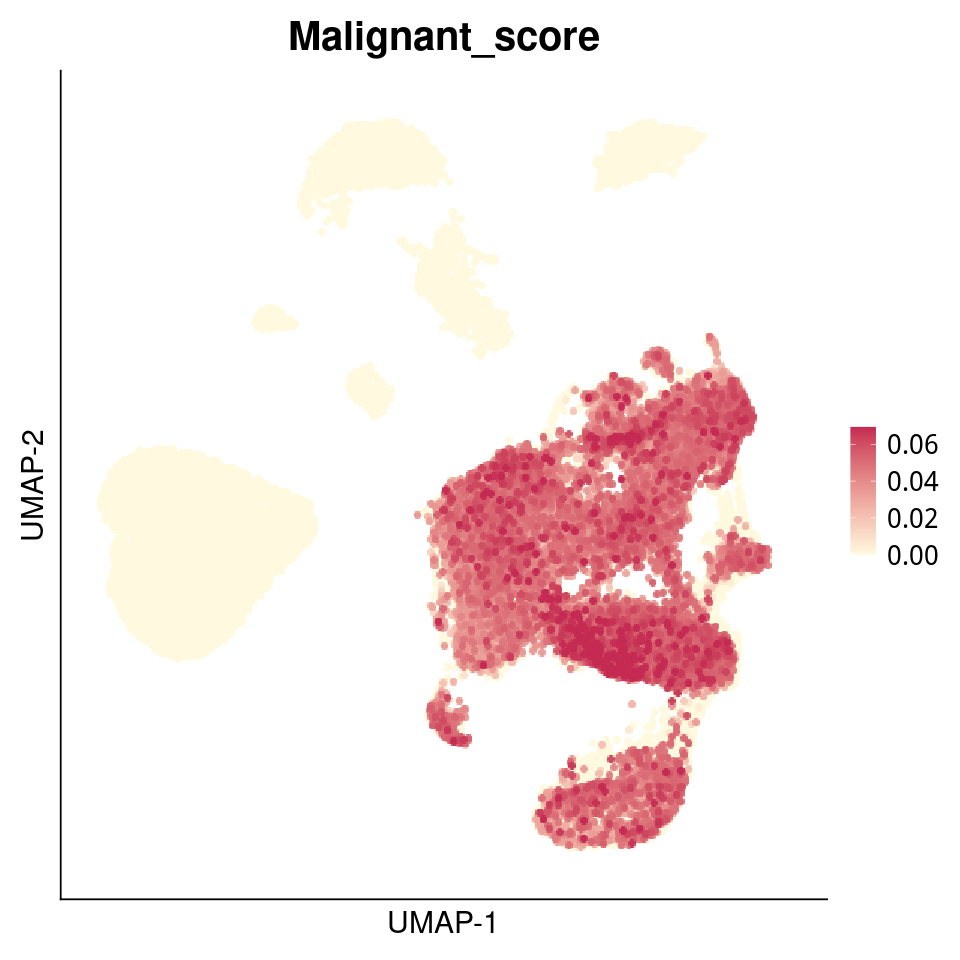

In [24]:
pdf(file = './Fig_pdf/Supple_Fig1a.pdf', width=8, height=8)
options(repr.plot.width=8, repr.plot.height=8)
p <- FeaturePlot(h5_obj_SCT_harmony, features = c('Malignant_score'), 
                 pt.size=2, 
                 cols=c('#fffadf','#c52a52'),
            raster=T,
                 # raster.dpi=c(2048,2048),
                 order=T, ncol=4,
            max.cutoff='q99', combine=F
           )
p <- lapply(X = p, FUN = function(x) x + xlab('UMAP-1') + ylab('UMAP-2') + 
            theme(plot.title = element_text(size = 24, face = 'bold'),
                  axis.text=element_blank(),
                  axis.ticks = element_blank(),
                  axis.title=element_text(size=18),
                  legend.text=element_text(size=16)
                                              ))
p <- wrap_plots(plots = p, ncol=1)
p
dev.off()
p

## Supple Fig 1a

In [30]:
all_sample_meta = read.delim('./all_sample_meta.tsv', sep='\t', row.names=1, check.names=F)
assign_levels_mapping = read.delim('./assign_levels_mapping.tsv', sep='\t', check.names=F)

In [83]:

for (tmp_sample in c('735350_3','736083_3')){
    tmp_obj = readRDS(paste0('./ST/',tmp_sample,'/',tmp_sample,'_res.rds'))
    celltype_frac_df = read.table(paste0('./ST/',tmp_sample,'/STRIDE//assign_level3/STRIDE_spot_celltype_frac.txt'), sep='\t', check.names = F, row.names = 1, header = T)
    celltype_frac_df = celltype_frac_df[rownames(tmp_obj@meta.data),]
    # merge level3 to level1
    celltype_l1_list = levels(as.factor(assign_levels_mapping$assign.level1))
    for (tmp_ct_l1 in celltype_l1_list){
        tmp_ct_l3 = assign_levels_mapping[assign_levels_mapping$assign.level1 == tmp_ct_l1,'assign.level3']
        if (length(tmp_ct_l3) > 1){
            if (tmp_ct_l1 == 'Epithelial'){
                # tmp_obj@meta.data$Malignant = apply(celltype_frac_df[,grepl('Mal',tmp_ct_l3)], FUN=mean, MARGIN=1)
                tmp_obj@meta.data$`Normal Epithelial` = apply(celltype_frac_df[,!grepl('Mal',tmp_ct_l3)], FUN=mean, MARGIN=1)
            } else {
                tmp_obj@meta.data[,tmp_ct_l1] = apply(celltype_frac_df[,tmp_ct_l3], FUN=mean, MARGIN=1)
            }
        } else {
            tmp_obj@meta.data[,tmp_ct_l1] = celltype_frac_df[,tmp_ct_l3]
        }
        
    }
    
    ncol=8
    fig_sacle_size=8
    celltype_l1_list = c('T','B','Plasma','Mono/Macro','Mast','Normal Epithelial','Malignant','Fib/Endo')
    pdf(file = paste0('./Fig_pdf/Supple_Fig1a_',tmp_sample,'.pdf'), width=fig_sacle_size*ncol, height=fig_sacle_size*ceiling(length(celltype_l1_list)/ncol))
    options(repr.plot.width=fig_sacle_size*ncol, repr.plot.height=fig_sacle_size*ceiling(length(celltype_l1_list)/ncol))
    p <- SpatialPlot(tmp_obj,features = celltype_l1_list, ncol = ncol, alpha = c(0.5, 1), image.alpha = 0.2, stroke = NA, combine=F)
    p <- lapply(X = p, FUN = function(x) x + theme(legend.title = element_text(size = 25, face = 'bold'),
                                                  legend.text = element_text(size = 12)) +
                scale_color_gradient(limits=c(min(tmp_obj@meta.data[,celltype_l1_list]),max(tmp_obj@meta.data[,celltype_l1_list]))))
    p <- wrap_plots(plots = p, ncol = ncol)
    print(p)
    dev.off()
    
}

In [82]:
for (tmp_sample in c('735350_4','736083_4')){
    tmp_obj = readRDS(paste0('./ST/',tmp_sample,'/',tmp_sample,'_res.rds'))
    celltype_frac_df = read.table(paste0('./ST/',tmp_sample,'/STRIDE//assign_level3/STRIDE_spot_celltype_frac.txt'), sep='\t', check.names = F, row.names = 1, header = T)
    celltype_frac_df = celltype_frac_df[rownames(tmp_obj@meta.data),]
    # merge level3 to level1
    celltype_l1_list = levels(as.factor(assign_levels_mapping$assign.level1))
    for (tmp_ct_l1 in celltype_l1_list){
        tmp_ct_l3 = assign_levels_mapping[assign_levels_mapping$assign.level1 == tmp_ct_l1,'assign.level3']
        if (length(tmp_ct_l3) > 1){
            tmp_obj@meta.data[,tmp_ct_l1] = apply(celltype_frac_df[,tmp_ct_l3], FUN=mean, MARGIN=1)
        } else {
            tmp_obj@meta.data[,tmp_ct_l1] = celltype_frac_df[,tmp_ct_l3]
        }
        
    }
    
    ncol=7
    fig_sacle_size=8
    celltype_l1_list = c('T','B','Plasma','Mono/Macro','Mast','Epithelial','Fib/Endo')
    pdf(file = paste0('./Fig_pdf/Supple_Fig1a_',tmp_sample,'.pdf'), width=fig_sacle_size*ncol, height=fig_sacle_size*ceiling(length(celltype_l1_list)/ncol))
    options(repr.plot.width=fig_sacle_size*ncol, repr.plot.height=fig_sacle_size*ceiling(length(celltype_l1_list)/ncol))
    p <- SpatialPlot(tmp_obj,features = celltype_l1_list, ncol = ncol, alpha = c(0.5, 1), image.alpha = 0.2, stroke = NA, combine=F)
    p <- lapply(X = p, FUN = function(x) x + theme(legend.title = element_text(size = 25, face = 'bold'),
                                                  legend.text = element_text(size = 12)) +
                scale_color_gradient(limits=c(min(tmp_obj@meta.data[,celltype_l1_list]),max(tmp_obj@meta.data[,celltype_l1_list]))))
    p <- wrap_plots(plots = p, ncol = ncol)
    print(p)
    dev.off()
    
}

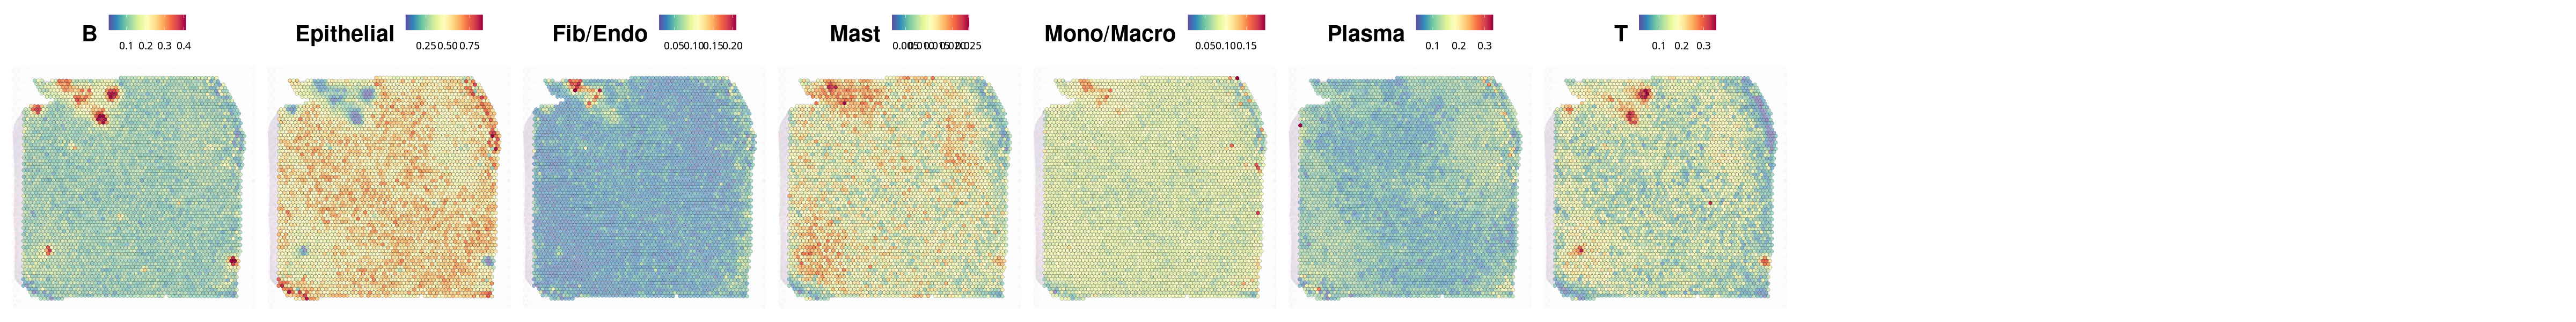

In [60]:
p

# Supple Fig 2

## Supple FIg2a

In [84]:
Normal_Epi_obj = readRDS('./Epi_subset/Normal_Epi_SCT_harmony.rds')

png 
  2

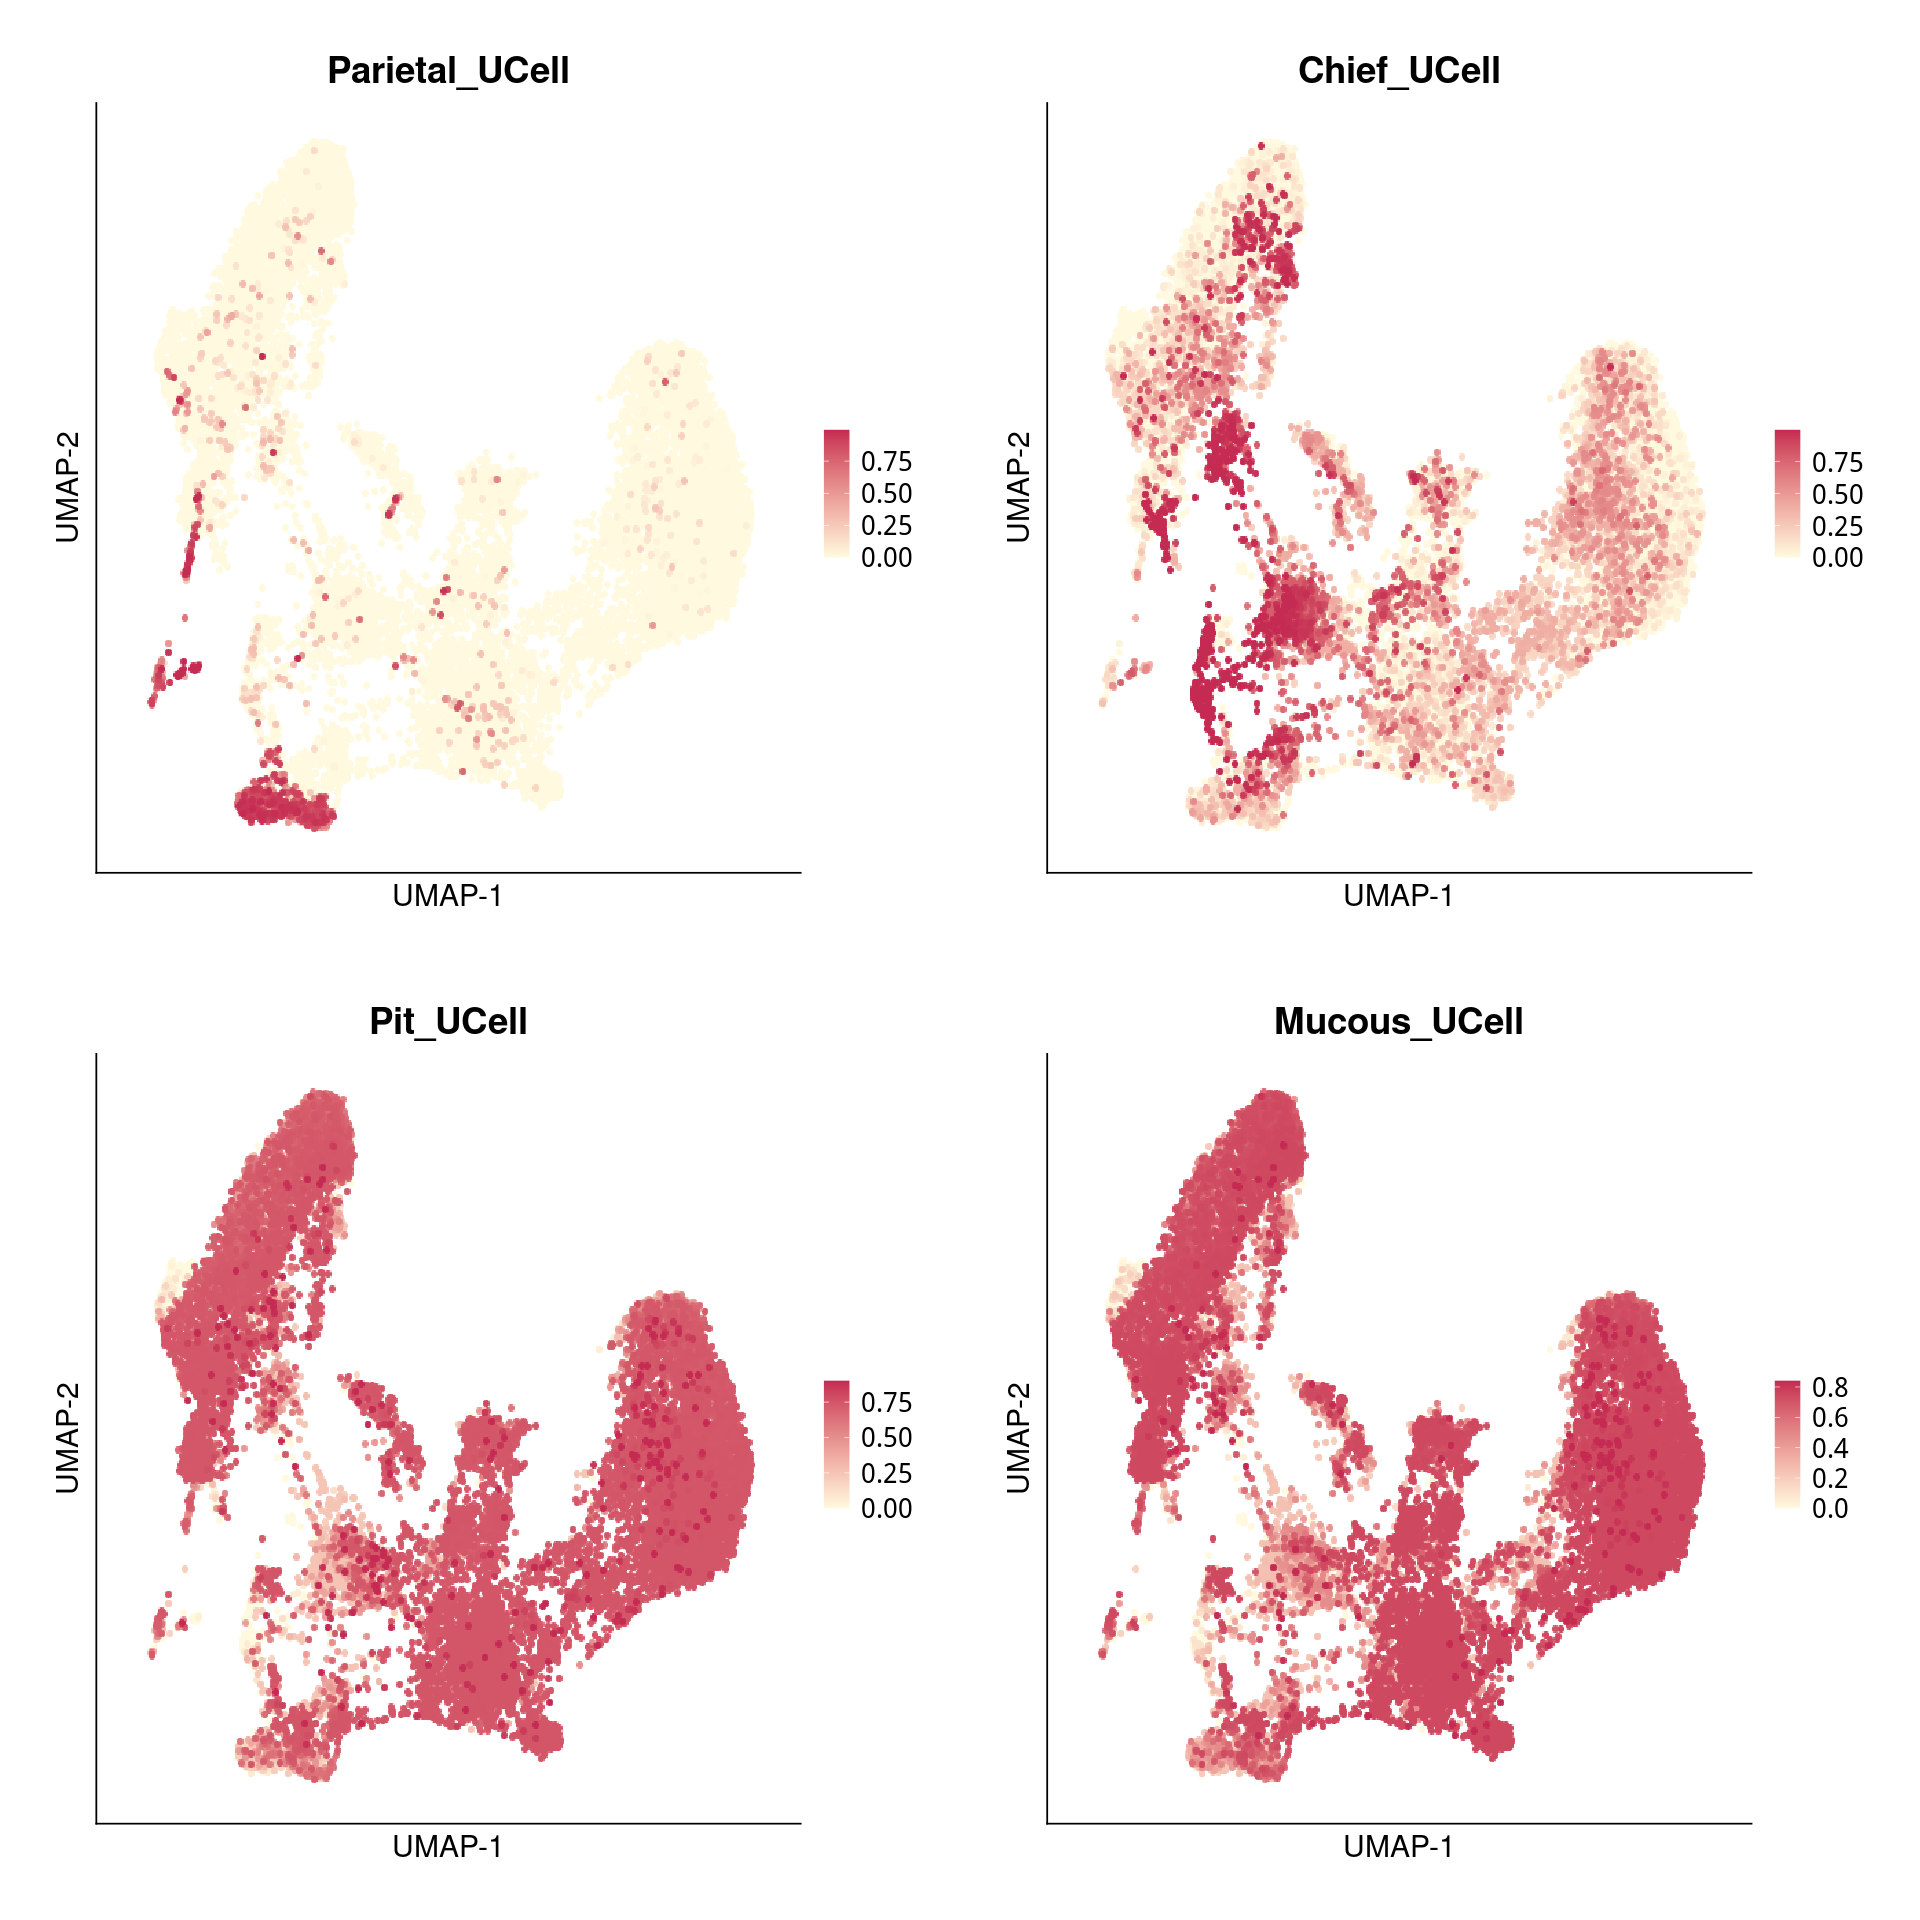

In [118]:
pdf(file = './Fig_pdf/Supple_Fig2a.pdf', width=16, height=16)
options(repr.plot.width=16, repr.plot.height=16)
p <- FeaturePlot(Normal_Epi_obj, features = c('Parietal_UCell','Chief_UCell','Pit_UCell','Mucous_UCell'), 
                 pt.size=2, 
                 cols=c('#fffadf','#c52a52'),
            raster=T,
                 # raster.dpi=c(2048,2048),
                 order=T, ncol=4,
            max.cutoff='q99', combine=F
           )
p <- lapply(X = p, FUN = function(x) x + xlab('UMAP-1') + ylab('UMAP-2') +
            theme(plot.title = element_text(size = 22, face = 'bold'),
                  axis.text=element_blank(),
                  axis.ticks = element_blank(),
                  axis.title=element_text(size=18),
                  legend.text=element_text(size=16),
                  plot.margin = unit(c(1,1,1,1), "cm")
                                              ))
p <- wrap_plots(plots = p, ncol=2, )
p
dev.off()
p

## Supple FIg 2b

[[1]]


png 
  2

[[1]]


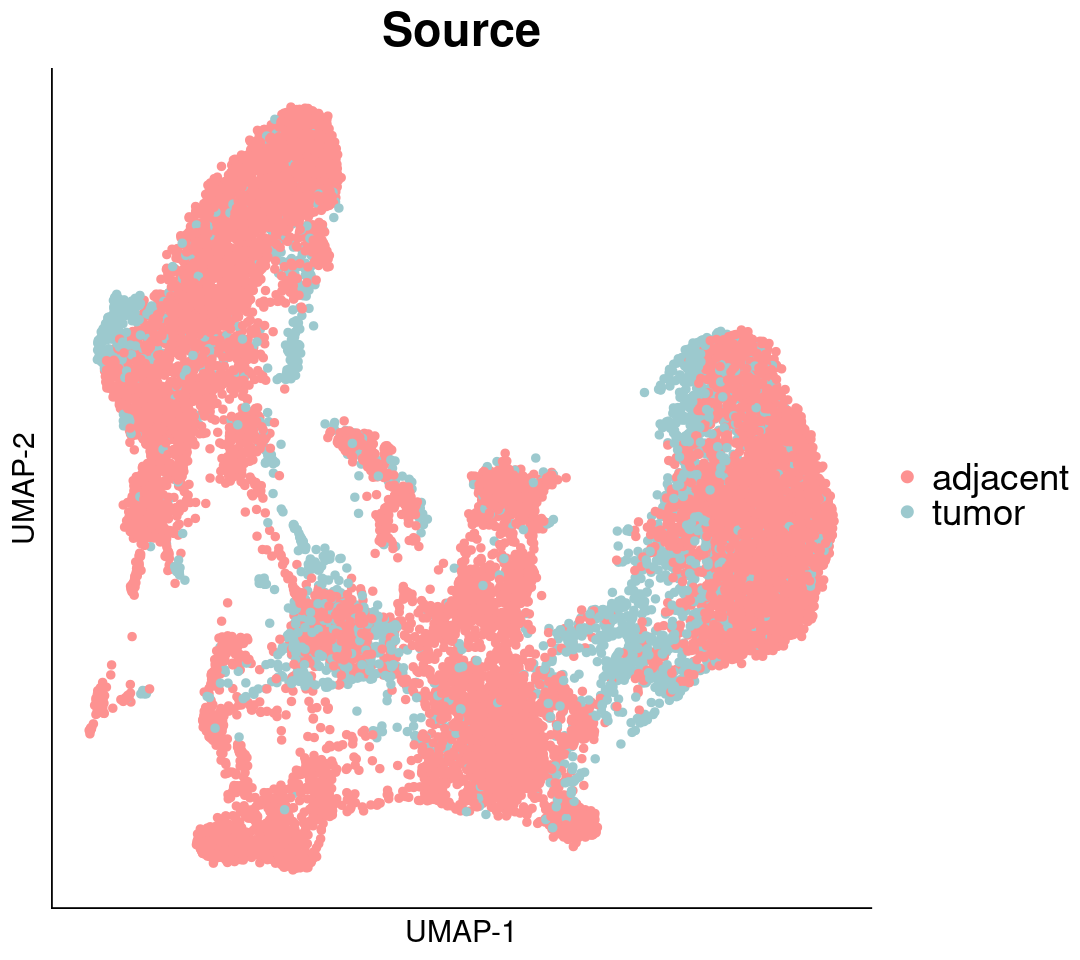

In [101]:
pdf(file = './Fig_pdf/Supple_Fig2b.pdf', width=9, height=8)
options(repr.plot.width=9, repr.plot.height=8)
p <- DimPlot(Normal_Epi_obj, group.by = c('Source'), 
             cols=c("#fd9291","#9cc9ce"),
                 pt.size=2,  combine=F
           )
p <- lapply(X = p, FUN = function(x) x + xlab('UMAP-1') + ylab('UMAP-2') + 
            theme(plot.title = element_text(size = 28, face = 'bold'),
                  axis.text=element_blank(),
                  axis.ticks = element_blank(),
                  axis.title=element_text(size=18),
                  legend.text=element_text(size=22)
                                              )) 
p
dev.off()
p

## Supple Fig 2c

png 
  2

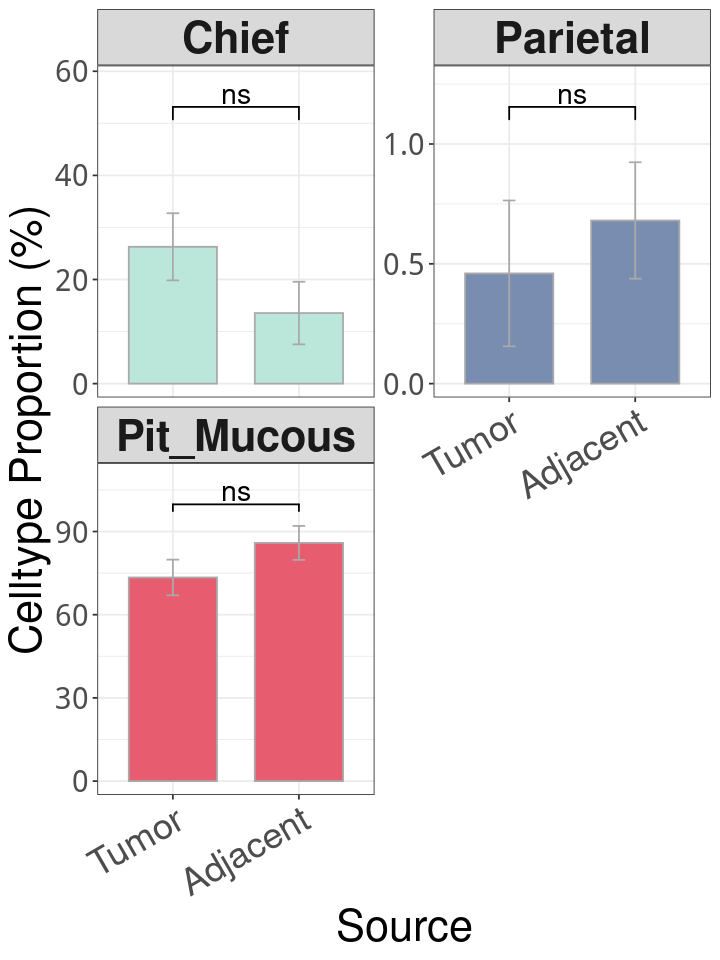

In [112]:
plot_df = Normal_Epi_obj@meta.data[,c('assign.level2','Source','Sample')] %>% group_by(Source) %>% count(Sample,assign.level2)
colnames(plot_df) = c('Source','Sample','Cell type','n')

sample_count_df = Normal_Epi_obj@meta.data[,c('Sample','Source')] %>% count(Sample)
colnames(sample_count_df) = c('Sample','Sample_freq')

plot_df = merge(plot_df, sample_count_df)
plot_df$Celltype_Proportion = plot_df$n/plot_df$Sample_freq*100
plot_df$Source = gsub('tumor','Tumor',plot_df$Source)
plot_df$Source = gsub('adjacent','Adjacent',plot_df$Source)

plot_df = plot_df[plot_df$Sample != 'P5_1',]


pdf(file = './Fig_pdf/Supple_Fig2b_boxplot.pdf', width=6, height=8)
options(repr.plot.width=6, repr.plot.height=8)
p <- ggbarplot(plot_df, x = "Source", y = "Celltype_Proportion",color= "darkgrey",
          position = position_dodge(0.8), palette=c('#bbe6da','#788db0','#e75d6f'),, fill='Cell type', add = "mean_se") +
  theme_bw() + 
  theme(legend.position = 'none',
      legend.text = element_text(size = 20), 
       legend.title = element_text(size = 24), 
       axis.text.x=element_text(size=22,angle=30,hjust=1),
       axis.text.y=element_text(size=18),
       axis.title=element_text(size=26)) +
  facet_wrap(~`Cell type`,  ncol=2, scale='free_y')  + 
  theme(strip.text.x = element_text(size = 26,face="bold")) +
  ylab('Celltype Proportion (%)') +
  # scale_x_discrete(limits=c("chemo", "no_treatment")) +
  stat_compare_means(comparisons = list(c('Tumor','Adjacent')),
                   label = 'p.signif',
                   label.x=1.5,
                   step.increase=0.1, bracket.size=0.5,
                     size=6, tip.length=0.05,hide.ns = F) + 
scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))
p
dev.off()
p

# Supple Fig 3

## Supple Fig 3a

## Supple Fig 3b

In [119]:
st1_obj = readRDS('./ST/735350_3/735350_3_res.rds')
st1_met = read.delim('./ST/735350_3/Compass//reactions_met.tsv', sep='\t', row.names=1, check.names = F)

st1_met = t(st1_met)

st1_obj@meta.data = cbind(st1_obj@meta.data,
                          apply(st1_met[rownames(st1_obj@meta.data),], FUN=as.numeric, MARGIN=2))

celltype_frac_df = read.table(file.path('./ST/735350_3/STRIDE//assign_level3/STRIDE_spot_celltype_frac.txt'), sep='\t', check.names = F, row.names = 1, header = T)
all_sample_meta = read.delim('./all_sample_meta.tsv', sep='\t', row.names=1, check.names=F)

# annotation by max cell type proportion
celltype_frac_df = celltype_frac_df[rownames(st1_obj@meta.data),]
st1_obj@meta.data$assign.max = colnames(celltype_frac_df)[apply(celltype_frac_df, FUN=which.max, 1)]

st1_obj@meta.data$assign.max[!(st1_obj@meta.data$assign.max %in% c('Mal_AGEJ_like','Mal_EAC_like','Mal_GC_like'))] = 'Normal'

In [120]:
st3_obj = readRDS('./ST/736083_3/736083_3_res.rds')
st3_met = read.delim('./ST/736083_3/Compass//reactions_met.tsv', sep='\t', row.names=1, check.names = F)

st3_met = t(st3_met)

st3_obj@meta.data = cbind(st3_obj@meta.data,
                          apply(st3_met[rownames(st3_obj@meta.data),], FUN=as.numeric, MARGIN=2))

celltype_frac_df = read.table(file.path('./ST/736083_3/STRIDE//assign_level3/STRIDE_spot_celltype_frac.txt'), sep='\t', check.names = F, row.names = 1, header = T)
all_sample_meta = read.delim('./all_sample_meta.tsv', sep='\t', row.names=1, check.names=F)

# annotation by max cell type proportion
celltype_frac_df = celltype_frac_df[rownames(st3_obj@meta.data),]
st3_obj@meta.data$assign.max = colnames(celltype_frac_df)[apply(celltype_frac_df, FUN=which.max, 1)]
for (tmp_c in levels(as.factor(st3_obj@meta.data$assign.max))){
    if (tmp_c %in% c('Mal_AGEJ_like','Mal_EAC_like','Mal_GC_like')){
        st3_obj@meta.data$assign.max[st3_obj@meta.data$assign.max == tmp_c] = 'Tumor'
    } else {
        st3_obj@meta.data$assign.max[st3_obj@meta.data$assign.max == tmp_c] = unique(all_sample_meta[all_sample_meta$assign.level3 == tmp_c, 'assign.level1'])
    }
    
}
st3_obj@meta.data$assign.max[st3_obj@meta.data$assign.max != 'Tumor'] = 'Normal'


### st1

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


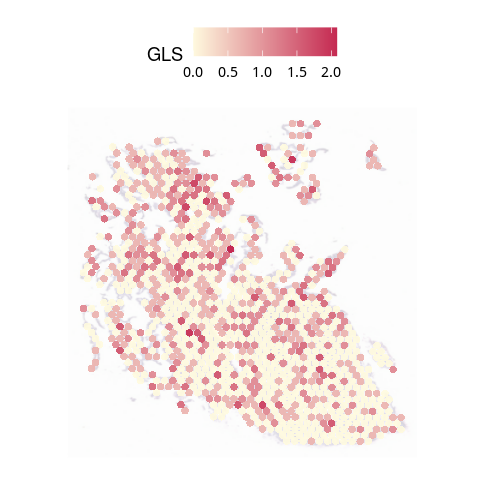

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


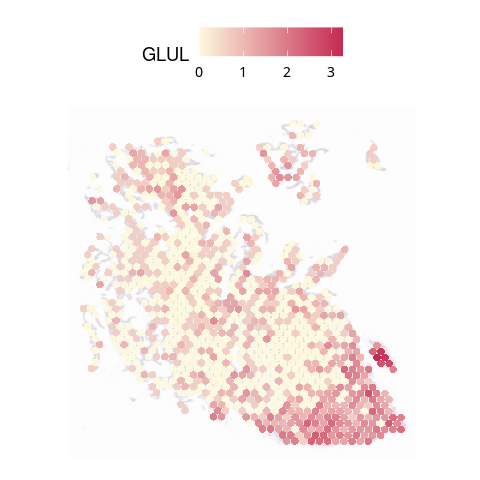

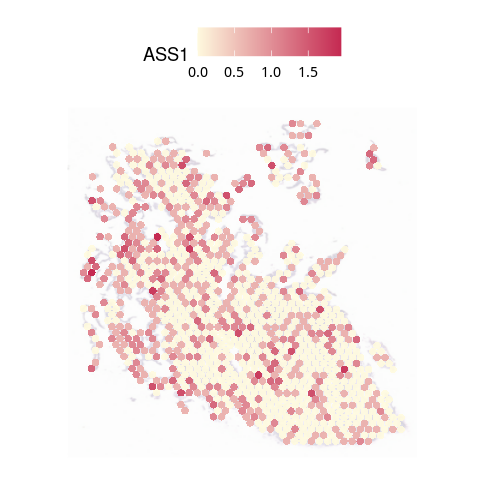

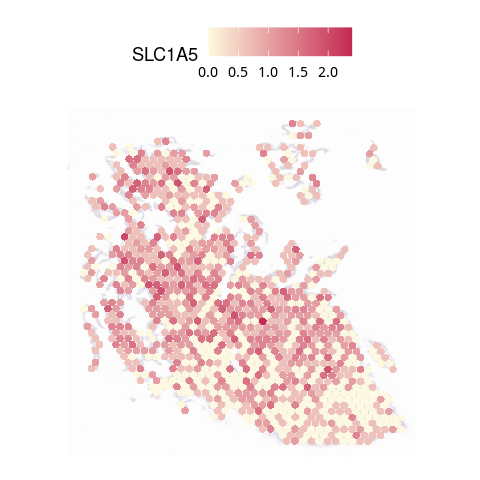

In [138]:
# options(repr.plot.width=4, repr.plot.height=4)

# SpatialPlot(st1_obj,features = c('GLUL'), ncol = 1, alpha = c(0.9, 1),
#                     pt.size.factor=2.2, 
#             stroke=NA,
#                  image.alpha = 0.2, combine=T) + scale_fill_gradientn(colours = colorRampPalette(c('#fffadf','#c52a52'))(500))

select_features = c('GLS','GLUL','ASS1','SLC1A5')
for (tmp_f in select_features){
    pdf(file = paste0('./Fig_pdf/Supple_Fig3b_st1_',tmp_f,'.pdf'), width=4, height=4)
    options(repr.plot.width=4, repr.plot.height=4)
    p = SpatialPlot(st1_obj,features = c(tmp_f), ncol = 1, alpha = c(0.9, 1),
                        pt.size.factor=2.2,
                                stroke=NA,
                     image.alpha = 0.2, combine=T) + scale_fill_gradientn(colours = colorRampPalette(c('#fffadf','#c52a52'))(500)) +
    theme(legend.position = "none")
    print(p)
    dev.off()
    
    p = SpatialPlot(st1_obj,features = c(tmp_f), ncol = 1, alpha = c(0.9, 1),
                        pt.size.factor=2.2,
                                stroke=NA,
                     image.alpha = 0.2, combine=T) + scale_fill_gradientn(colours = colorRampPalette(c('#fffadf','#c52a52'))(500))
    print(p)

}

In [136]:
Idents(st1_obj) = factor(st1_obj@meta.data$assign.max, levels = c('Mal_AGEJ_like','Mal_GC_like','Normal'), labels = c('AEG-like','GAC-like','Normal'))

select_features = c('GLS','GLUL','ASS1','SLC1A5')
for (tmp_f in select_features){

    p = VlnPlot(st1_obj, features = c(tmp_f), pt.size=0)
    plot_df = p[[1]]$data

    # options(repr.plot.width=2.5, repr.plot.height=4)
    # ggviolin(plot_df, x = "ident", y = 'GLUL', fill = "ident",
    #          # palette = c("#fd9291", "#9cc9ce"),
    #         palette = c( "#fd9291","#9cc9ce","#58b8ee"),
    #          # color='darkgrey',
    #              trim=F,
    #              width=1,
    #              # error.plot='none',
    #              remove='points',
    #              # order=c('Tumor','Normal'),
    #          add = c("boxplot",'median'), add.params = list(fill = "white"))+
    # scale_y_continuous(position = "right") +
    #   # facet_wrap(~type,  ncol=3, scale='free_y')  + 
    #   theme(strip.text.x = element_text(size = 16,face="bold"), legend.position = "none") +
    #   stat_compare_means(comparisons = list(c('AEG-like','GAC-like'),c('GAC-like','Normal'),c('AEG-like','Normal')),
    #                      label = "p.signif", bracket.size=0.75)

    pdf(file = paste0('./Fig_pdf/Supple_Fig3b_st1_boxplot_',tmp_f,'.pdf'), width=2.5, height=4)
    options(repr.plot.width=2.5, repr.plot.height=4)
    p = ggviolin(plot_df, x = "ident", y = tmp_f, fill = "ident",
             # palette = c("#fd9291", "#9cc9ce"),
            palette = c( "#fd9291","#9cc9ce","#58b8ee"),
             # color='darkgrey',
                 trim=F,
                 width=1,
                 # error.plot='none',
                 remove='points',
                 # order=c('Tumor','Normal'),
             add = c("boxplot",'median'), add.params = list(fill = "white"))+
    scale_y_continuous(position = "right") +
      # facet_wrap(~type,  ncol=3, scale='free_y')  + 
      theme(strip.text.x = element_text(size = 16,face="bold"), legend.position = "none") +
      stat_compare_means(comparisons = list(c('AEG-like','GAC-like'),c('GAC-like','Normal'),c('AEG-like','Normal')),
                         label = "p.signif", bracket.size=0.75)
    print(p)
    dev.off()
}

### st3

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


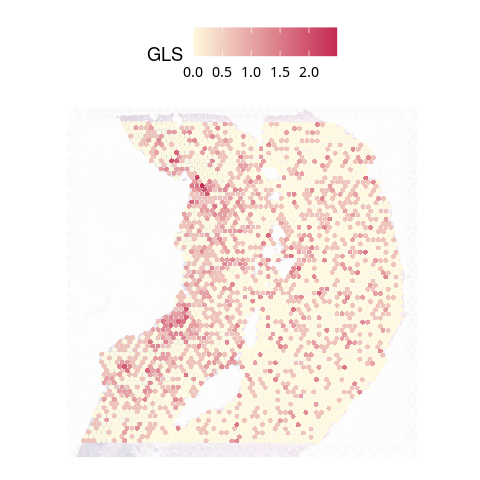

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


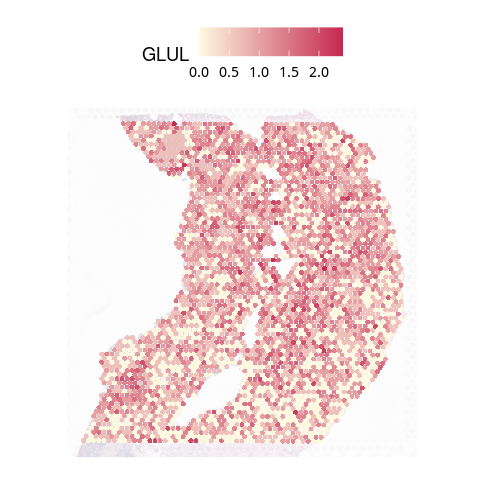

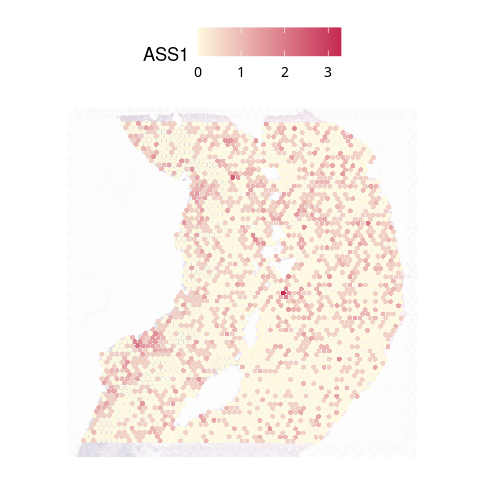

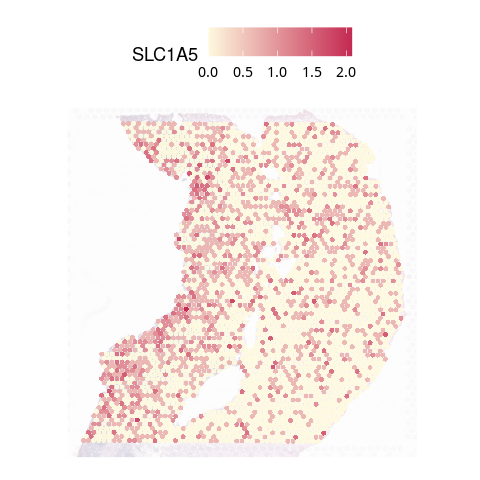

In [139]:
# options(repr.plot.width=4, repr.plot.height=4)

# SpatialPlot(st3_obj,features = c('SMS'), ncol = 1, alpha = c(0.9, 1),
#                     pt.size.factor=1.5, 
#             stroke=NA,
#                  image.alpha = 0.2, combine=T) + scale_fill_gradientn(colours = colorRampPalette(c('#fffadf','#c52a52'))(500))

select_features = c('GLS','GLUL','ASS1','SLC1A5')
for (tmp_f in select_features){

    pdf(file = paste0('./Fig_pdf/Supple_Fig3b_st3_',tmp_f,'.pdf'), width=4, height=4)
    options(repr.plot.width=4, repr.plot.height=4)
    p = SpatialPlot(st3_obj,features = c(tmp_f), ncol = 1, alpha = c(0.9, 1),
                        pt.size.factor=1.5,
                                stroke=NA,
                     image.alpha = 0.2, combine=T) + scale_fill_gradientn(colours = colorRampPalette(c('#fffadf','#c52a52'))(500)) +
    theme(legend.position = "none")
    print(p)
    dev.off()
    
    
    p = SpatialPlot(st3_obj,features = c(tmp_f), ncol = 1, alpha = c(0.9, 1),
                        pt.size.factor=1.5,
                                stroke=NA,
                     image.alpha = 0.2, combine=T) + scale_fill_gradientn(colours = colorRampPalette(c('#fffadf','#c52a52'))(500)) 
    print(p)

}

In [135]:
Idents(st3_obj) = factor(st3_obj@meta.data$assign.max, levels = c('Tumor','Normal'), labels = c('AEG-like','Normal'))

select_features = c('GLS','GLUL','ASS1','SLC1A5')
for (tmp_f in select_features){

    p = VlnPlot(st3_obj, features = c(tmp_f), pt.size=0)
    plot_df = p[[1]]$data

#     options(repr.plot.width=2.5, repr.plot.height=4)
#     ggviolin(plot_df[plot_df$SMS > 0,], x = "ident", y = 'SMS', fill = "ident",
#              # palette = c("#fd9291", "#9cc9ce"),
#             palette = c( "#fd9291","#58b8ee"),
#              # color='darkgrey',
#                  trim=T,
#                  width=1,
#                  # error.plot='none',
#                  remove='points',
#                  # order=c('Tumor','Normal'),
#              add = c("boxplot",'median'), add.params = list(fill = "white"))+
#     scale_y_continuous(position = "right") +
#       # facet_wrap(~type,  ncol=3, scale='free_y')  + 
#       theme(strip.text.x = element_text(size = 16,face="bold"), legend.position = "none") +
#       stat_compare_means(comparisons = list(c('AEG-like','Normal')),
#                          label = "p.signif", bracket.size=0.75)

    pdf(file = paste0('./Fig_pdf/Supple_Fig3b_st3_boxplot_',tmp_f,'.pdf'), width=2.5, height=4)
    options(repr.plot.width=2.5, repr.plot.height=4)
    p = ggviolin(plot_df, x = "ident", y = tmp_f, fill = "ident",
             # palette = c("#fd9291", "#9cc9ce"),
            palette = c( "#fd9291","#58b8ee"),
             # color='darkgrey',
                 trim=T,
                 width=1,
                 # error.plot='none',
                 remove='points',
                 # order=c('Tumor','Normal'),
             add = c("boxplot",'median'), add.params = list(fill = "white"))+
    scale_y_continuous(position = "right") +
      # facet_wrap(~type,  ncol=3, scale='free_y')  + 
      theme(strip.text.x = element_text(size = 16,face="bold"), legend.position = "none") +
      stat_compare_means(comparisons = list(c('AEG-like','Normal')),
                         label = "p.signif", bracket.size=0.75)
    print(p)
    dev.off()
}

# Supple Fig 4

In [140]:
T_obj = readRDS('./Immune_subset/T_SCT_harmony.rds')
B_obj = readRDS('./Immune_subset/B_SCT_harmony.rds')
Mye_obj = readRDS('./Immune_subset/Mono_Macro_SCT_harmony.rds')

In [147]:
immune_obj = merge(T_obj,list(B_obj,Mye_obj), add.cell.ids=c('T','B','Mye'))

## Supple Fig 4b

png 
  2

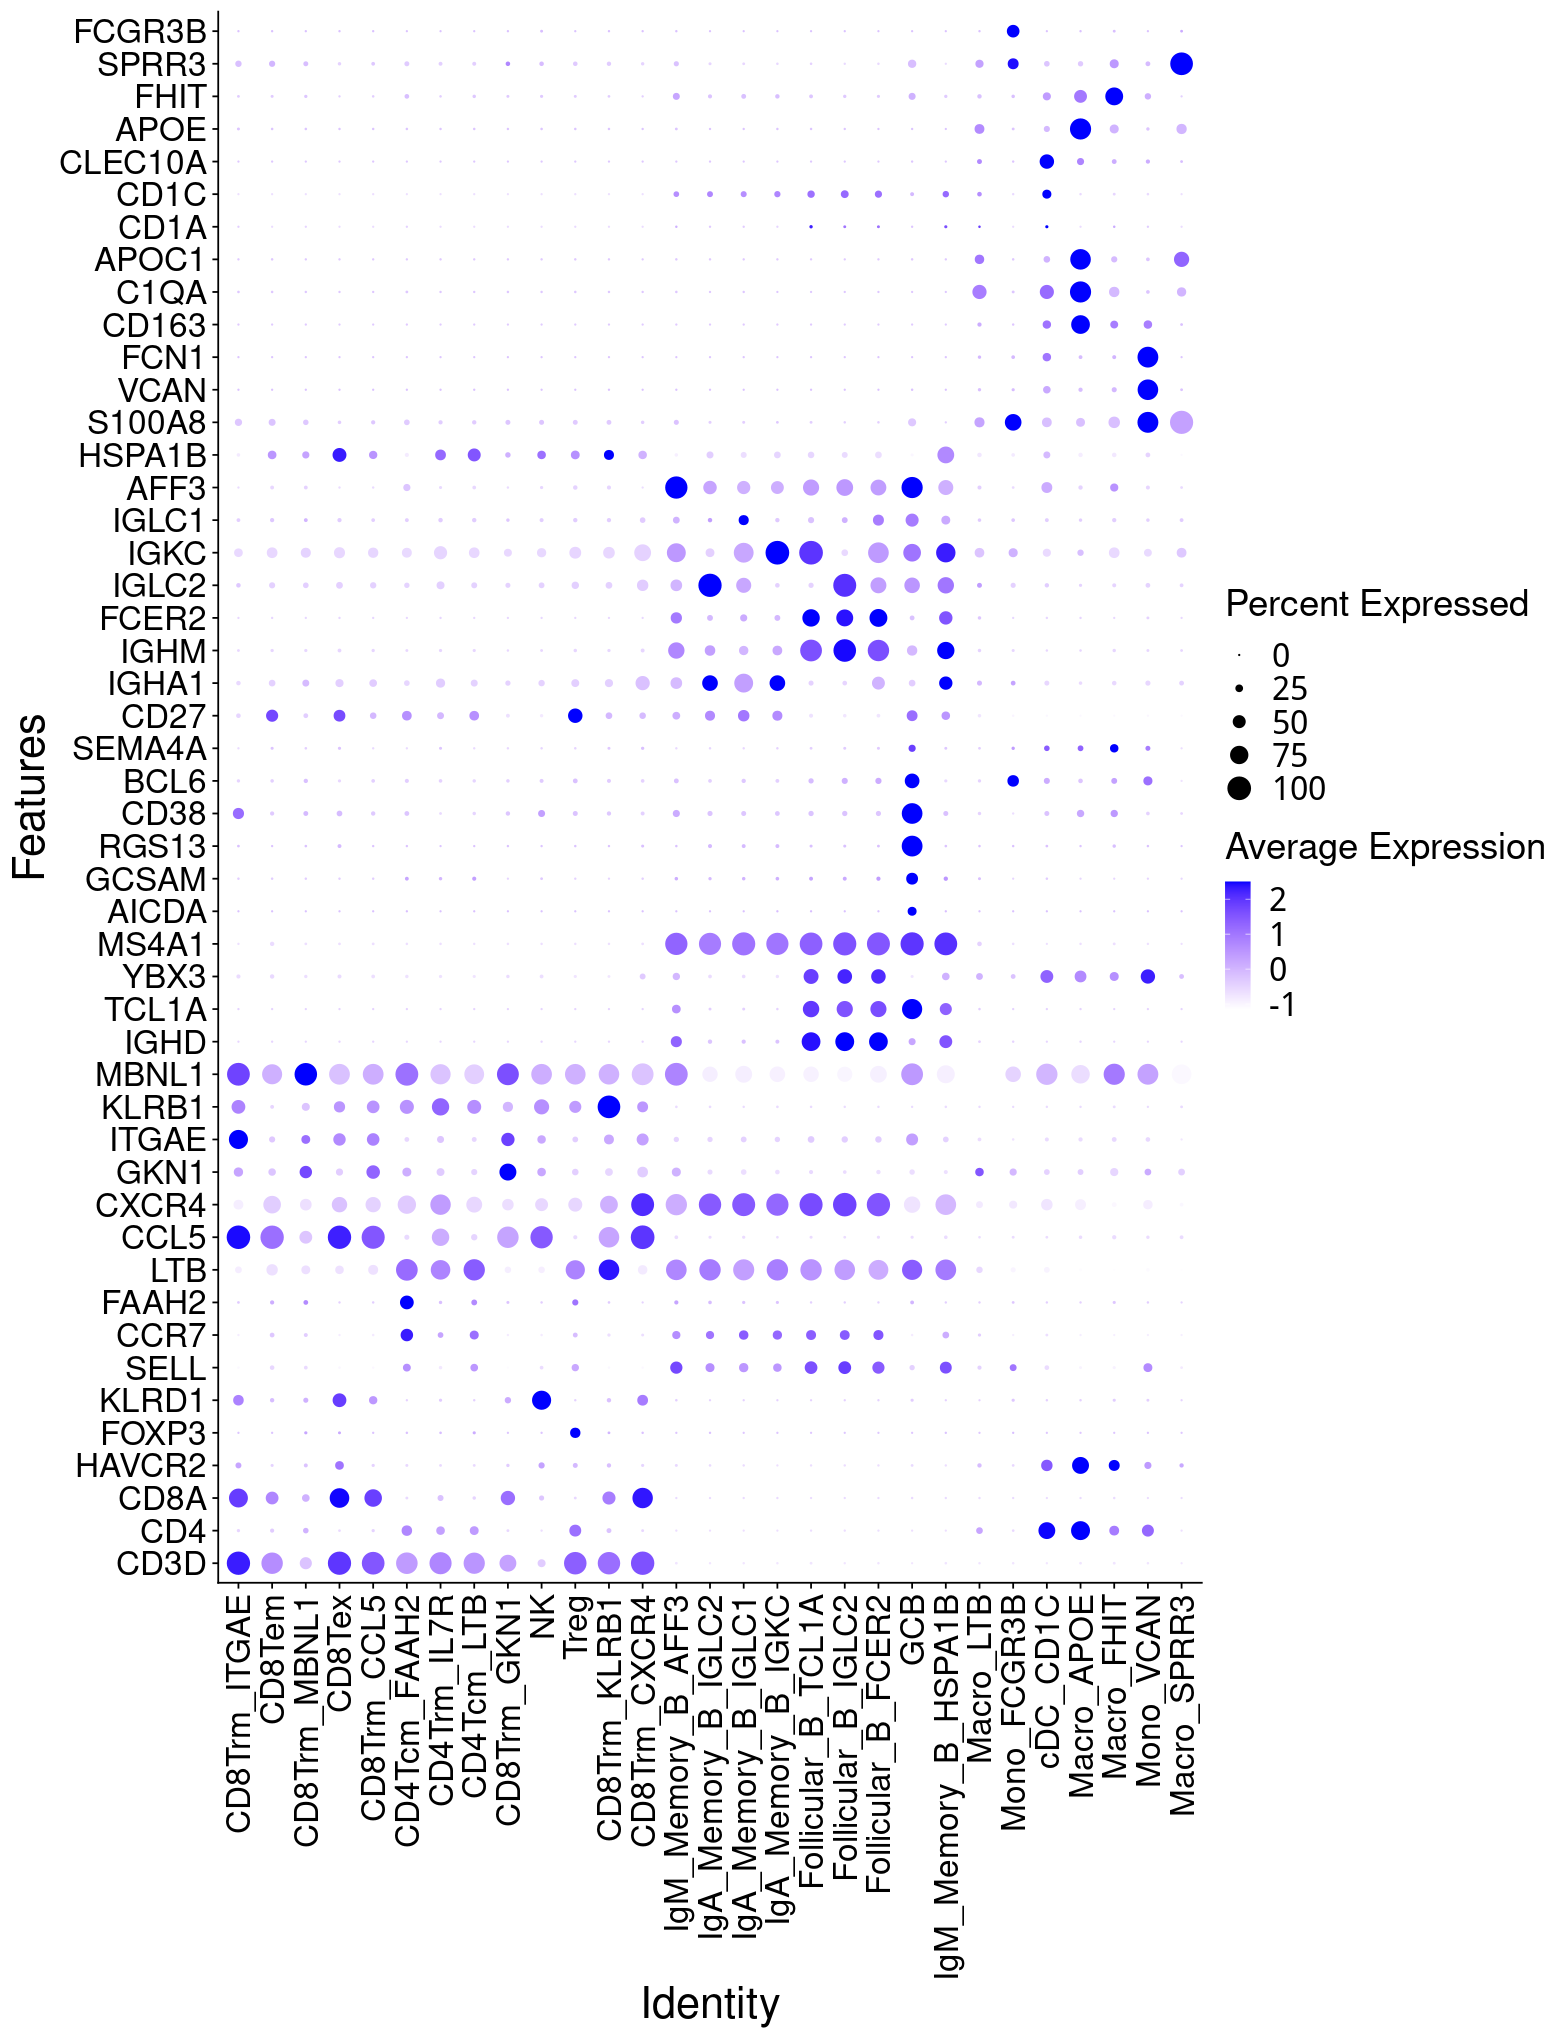

In [180]:
Idents(immune_obj) = immune_obj@meta.data$assign.level3
select_genes = unique(c('CD3D','CD4','CD8A','HAVCR2','FOXP3','KLRD1','SELL','CCR7','FAAH2','LTB','CCL5','CXCR4','GKN1','ITGAE','KLRB1','MBNL1',
                 'IGHD', 'TCL1A', 'YBX3', 'MS4A1', 'AICDA', 'GCSAM', 'RGS13',   'CD38', 'BCL6', 'SEMA4A',  'CD27', 'IGHD', 'IGHA1', 'IGHM', 'FCER2', 'IGLC2','TCL1A','IGKC','IGLC1','IGLC2','AFF3','HSPA1B',
                 'S100A8', 'VCAN', 'FCN1', 'CD163', 'C1QA', 'APOC1', 'CD1A', 'CD1C', 'CLEC10A', 'APOE','FHIT','SPRR3','FCGR3B','VCAN'
                ))

pdf(file = './Fig_pdf/Supple_Fig4b.pdf', width=13, height=17)
options(repr.plot.width=13, repr.plot.height=17)
p = DotPlot(immune_obj, cols = c("white", "blue"),
            features = select_genes)
p = p + coord_flip() + theme(
      legend.text = element_text(size = 20), 
       legend.title = element_text(size = 22), 
       axis.text.x=element_text(size=20,angle=90,hjust=1, vjust=0.5),
       axis.text.y=element_text(size=20),
       axis.title=element_text(size=26))
p
dev.off()
p

## Supple Fig 4c

png 
  2

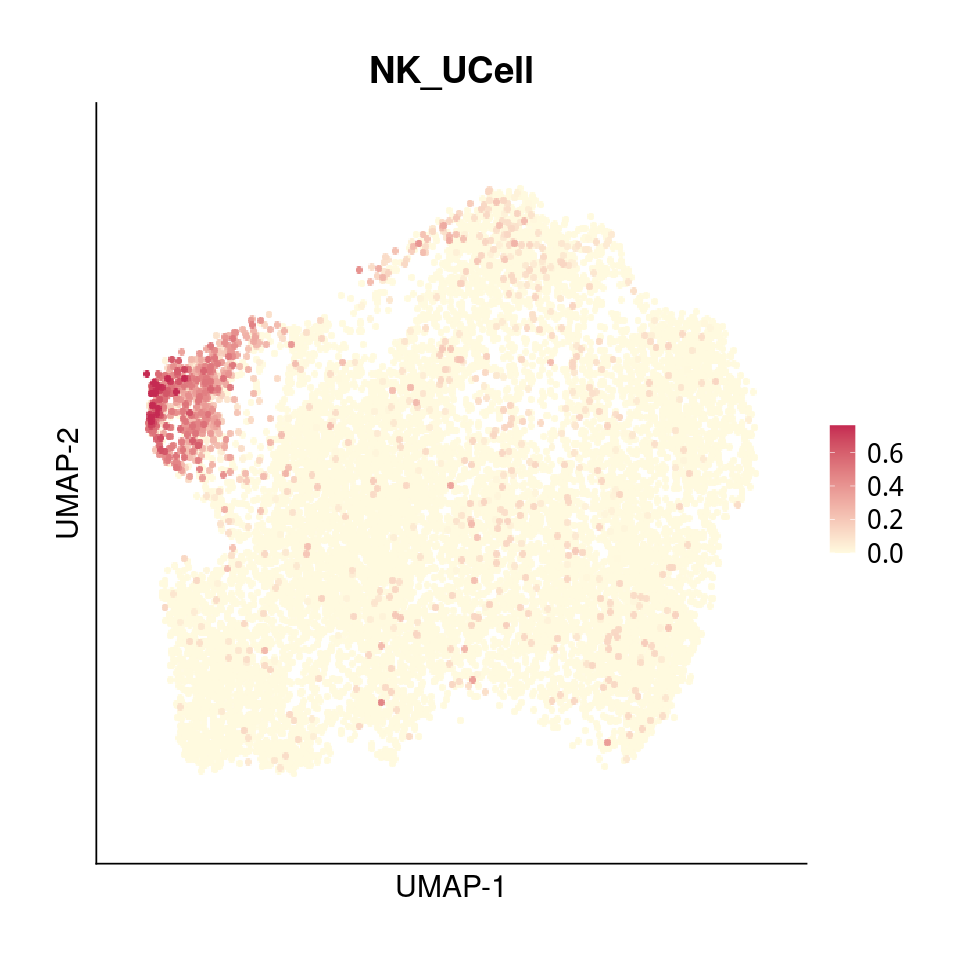

In [179]:
pdf(file = './Fig_pdf/Supple_Fig4b.pdf', width=8, height=8)
options(repr.plot.width=8, repr.plot.height=8)
p <- FeaturePlot(T_obj, features = c('NK_UCell'), 
                 pt.size=2, 
                 cols=c('#fffadf','#c52a52'),
            raster=T,
                 # raster.dpi=c(2048,2048),
                 order=T, ncol=4,
            max.cutoff='q99', combine=F
           )
p <- lapply(X = p, FUN = function(x) x + xlab('UMAP-1') + ylab('UMAP-2') +
            theme(plot.title = element_text(size = 22, face = 'bold'),
                  axis.text=element_blank(),
                  axis.ticks = element_blank(),
                  axis.title=element_text(size=18),
                  legend.text=element_text(size=16),
                  plot.margin = unit(c(1,1,1,1), "cm")
                                              ))
p <- wrap_plots(plots = p, ncol=1)
p
dev.off()
p

In [186]:
sig_list = list(
    Memory_B = c('CD27','IGHD-')
)
B_obj = AddModuleScore_UCell(B_obj, features = sig_list, ncores = 1)

In [187]:
for (tmp_ct in c('Follicular_B_UCell','Germinal_center_B_UCell','Memory_B_UCell','IGHA1','IGHM')){

    pdf(file = paste0('./Fig_pdf/Supple_Fig4c_',tmp_ct,'.pdf'), width=8, height=8)
    options(repr.plot.width=8, repr.plot.height=8)
    p <- FeaturePlot(B_obj, features = tmp_ct, 
                     pt.size=2, 
                     cols=c('#fffadf','#c52a52'),
                raster=T,
                     # raster.dpi=c(2048,2048),
                     order=T, ncol=4,
                max.cutoff='q99', combine=F
               )
    p <- lapply(X = p, FUN = function(x) x + xlab('UMAP-1') + ylab('UMAP-2') +
                theme(plot.title = element_text(size = 22, face = 'bold'),
                      axis.text=element_blank(),
                      axis.ticks = element_blank(),
                      axis.title=element_text(size=18),
                      legend.text=element_text(size=16),
                      plot.margin = unit(c(1,1,1,1), "cm")
                                                  ))
    p <- wrap_plots(plots = p, ncol=1)
    print(p)
    dev.off()
    p
}

In [188]:
for (tmp_ct in c('Mono_UCell','Macro_UCell','cDC_UCell')){

    pdf(file = paste0('./Fig_pdf/Supple_Fig4c_',tmp_ct,'.pdf'), width=8, height=8)
    options(repr.plot.width=8, repr.plot.height=8)
    p <- FeaturePlot(Mye_obj, features = tmp_ct, 
                     pt.size=2, 
                     cols=c('#fffadf','#c52a52'),
                raster=T,
                     # raster.dpi=c(2048,2048),
                     order=T, ncol=4,
                max.cutoff='q99', combine=F
               )
    p <- lapply(X = p, FUN = function(x) x + xlab('UMAP-1') + ylab('UMAP-2') +
                theme(plot.title = element_text(size = 22, face = 'bold'),
                      axis.text=element_blank(),
                      axis.ticks = element_blank(),
                      axis.title=element_text(size=18),
                      legend.text=element_text(size=16),
                      plot.margin = unit(c(1,1,1,1), "cm")
                                                  ))
    p <- wrap_plots(plots = p, ncol=1)
    print(p)
    dev.off()
    p
}

## Supple Fig 4d

png 
  2

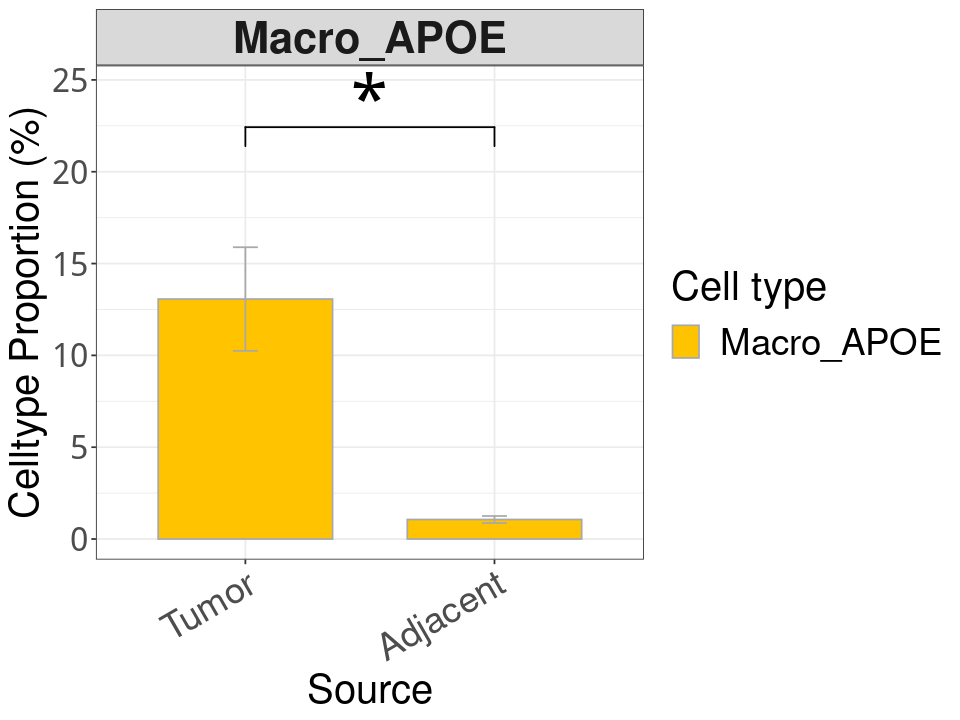

In [204]:
Mye_obj@meta.data$Source = gsub(1,'tumor',Mye_obj@meta.data$Source)
Mye_obj@meta.data$Source = gsub(2,'adjacent',Mye_obj@meta.data$Source)

ct_sample_count_df = Mye_obj@meta.data[,c('Source','assign.level3','Sample','Patient')] %>%
                        group_by(Source) %>% count(Patient,assign.level3)
colnames(ct_sample_count_df) = c('Source','Sample','Cell type','n')

sample_count_df = Mye_obj@meta.data[,c('Patient','Source')] %>% count(Patient)
colnames(sample_count_df) = c('Sample','Sample_freq')

plot_df = merge(ct_sample_count_df, sample_count_df)
plot_df$Celltype_Proportion = plot_df$n/plot_df$Sample_freq*100
plot_df[is.na(plot_df)] = 0

plot_df = plot_df[plot_df$`Cell type` == 'Macro_APOE',]

pdf(file = './Fig_pdf/Supple_Fig4d.pdf', width=8, height=6)
options(repr.plot.width=8, repr.plot.height=6)
p <- ggbarplot(plot_df, x = "Source", y = "Celltype_Proportion",color= "darkgrey",
          position = position_dodge(0.8), 
               palette=c('#ffc300',  '#ffe57c', '#fff4af', '#fd9291', '#ffc8b5', '#ffdbce', '#6b6fa0', '#788db0', '#88abbf'),
               fill='Cell type', add = "mean_se") +
  theme_bw() + 
  theme(legend.text = element_text(size = 22), 
       legend.title = element_text(size = 24), 
       axis.text.x=element_text(size=22,angle=30,hjust=1),
       axis.text.y=element_text(size=20),
       axis.title=element_text(size=24)) +
  facet_wrap(~`Cell type`,  ncol=1)  + 
  theme(strip.text.x = element_text(size = 26,face="bold")) +
  ylab('Celltype Proportion (%)') +
  scale_x_discrete(limits=c("tumor", "adjacent"), labels=c('Tumor','Adjacent')) +
  stat_compare_means(comparisons = list(c('tumor','adjacent')),
                   label = 'p.signif',
                   label.x=1.5,
                   step.increase=0.1, bracket.size=0.5,
                     size=14, tip.length=0.05,hide.ns = F) + 
scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))
print(p)
dev.off()
p

# Supple Fig 5

In [207]:
all_sample_obj = readRDS('./CellChat/Malignant_CCI/full_set/assign_level3_cellchat.rds')


## Supple Fig 5a

Comparing communications on a single object 




png 
  2

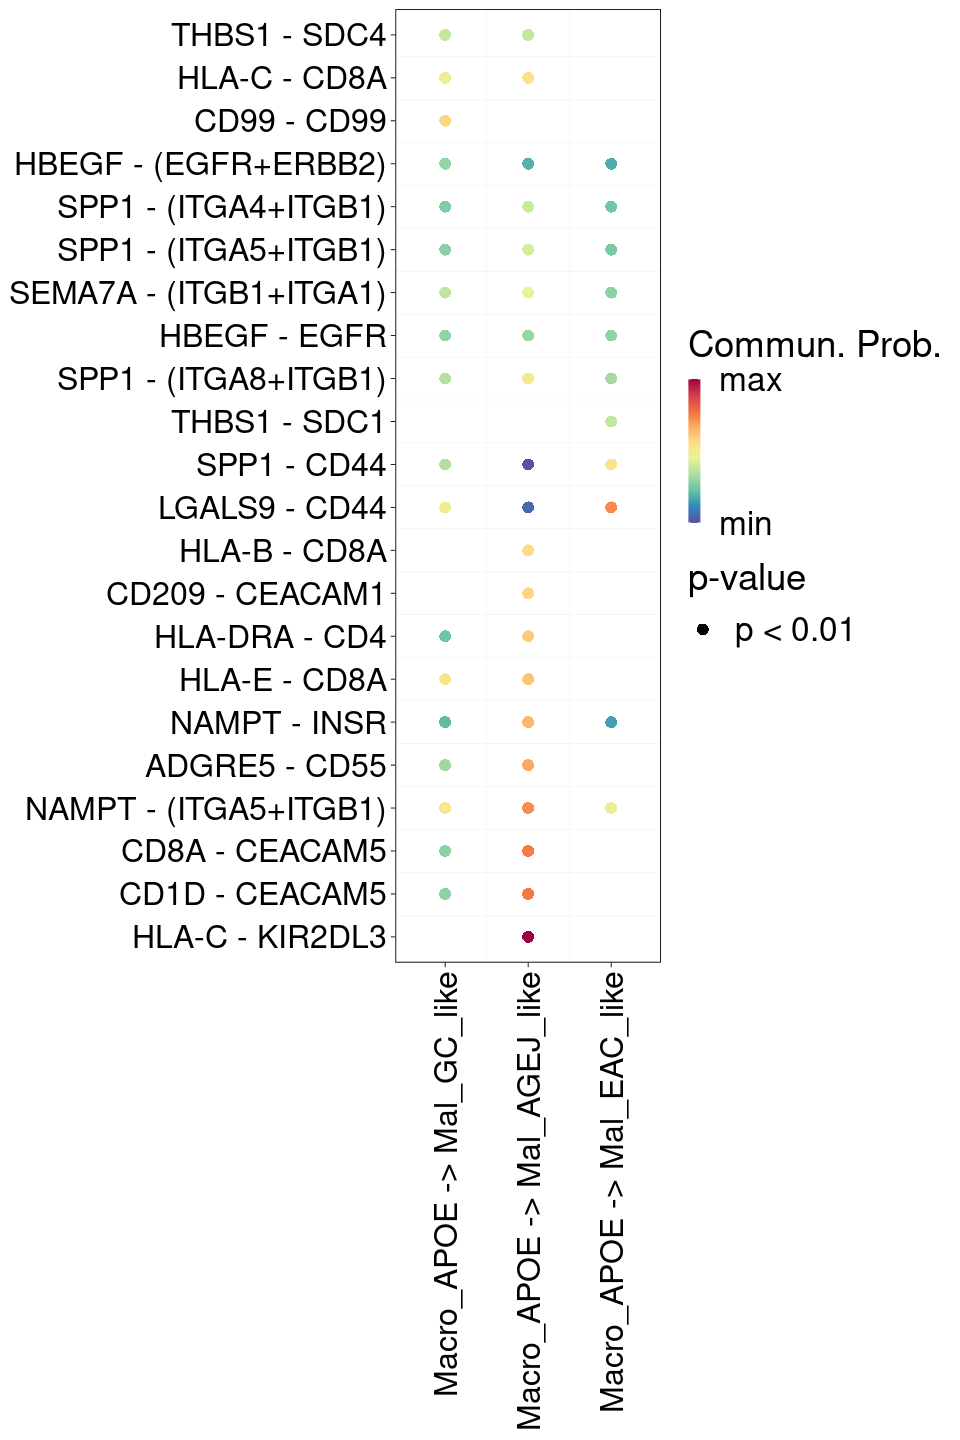

In [221]:
# manually filter sig top n LRs 
n_top=10

cc_pval = all_sample_obj@net$pval
cc_prob = all_sample_obj@net$prob

sources.use = c('Macro_APOE')
targets.use = c('Mal_AGEJ_like','Mal_EAC_like','Mal_GC_like')

select_lrs = c()
tmp_cci_df = data.frame()
for (tmp_t in targets.use){
    tmp_pval = cc_pval[sources.use,tmp_t,]
    tmp_prob = cc_prob[sources.use,tmp_t,]
    tmp_prob = tmp_prob[which(tmp_pval < 0.01)]
    tmp_prob = sort(tmp_prob, decreasing = T)
    select_lrs = c(select_lrs, names(tmp_prob[1:n_top]))
    
}

select_lrs = data.frame(unique(select_lrs))
colnames(select_lrs) = c('interaction_name')

pdf(file = './Fig_pdf/Supple_Fig5a.pdf', width=8, height=12)
options(repr.plot.width=8,repr.plot.height=12)
tmp_cci_df = netVisual_bubble(all_sample_obj, sources.use = sources.use,
                 targets.use = targets.use,
                pairLR.use = select_lrs,
                              color.heatmap=c('Spectral'),
                 remove.isolate = T,
                 n.colors=10,
                 thresh=0.01,
                min.dataset = 0.05,
                font.size=24,
                 angle.x=90,
                 sort.by.source.priority=T,
                            return.data=T,
                             )

tmp_cci_df$gg.ob + theme(legend.text=element_text(size=20), legend.title=element_text(size=22))
dev.off()
tmp_cci_df$gg.ob + theme(legend.text=element_text(size=20), legend.title=element_text(size=22))

In [222]:
max(tmp_cci_df$communication$prob)

[1] 0.2263263

In [224]:
min(tmp_cci_df$communication$prob)

[1] 0.09347931

# Supple Fig 6

## Supple Fig 6a

In [227]:
select_cts = c('CD4Tcm','CD4Trm','CD8Tem','CD8Trm','Follicular_B','IgA_Memory_B','IgM_Memory_B','GCB','Mono','Macro','Fibroblasts')
for (tmp_sample in c('736083_3','736083_4')){
    tmp_obj = readRDS(paste0('./ST/',tmp_sample,'/',tmp_sample,'_res.rds'))
    celltype_frac_df = read.table(paste0('./ST/',tmp_sample,'/STRIDE//assign_level3/STRIDE_spot_celltype_frac.txt'), sep='\t', check.names = F, row.names = 1, header = T)
    celltype_frac_df = celltype_frac_df[rownames(tmp_obj@meta.data),]
    # merge level3 to level2
    celltype_l2_list = levels(as.factor(assign_levels_mapping$assign.level2))
    for (tmp_ct_l2 in celltype_l2_list){
        tmp_ct_l3 = assign_levels_mapping[assign_levels_mapping$assign.level2 == tmp_ct_l2,'assign.level3']
        if (length(tmp_ct_l3) > 1){
            tmp_obj@meta.data[,tmp_ct_l2] = apply(celltype_frac_df[,tmp_ct_l3], FUN=mean, MARGIN=1)
        } else {
            tmp_obj@meta.data[,tmp_ct_l2] = celltype_frac_df[,tmp_ct_l3]
        }
        
    }
    
    ncol=11
    fig_sacle_size=8
    pdf(file = paste0('./Fig_pdf/Supple_Fig6a_',tmp_sample,'.pdf'), width=fig_sacle_size*ncol, height=fig_sacle_size*ceiling(length(select_cts)/ncol))
    options(repr.plot.width=fig_sacle_size*ncol, repr.plot.height=fig_sacle_size*ceiling(length(select_cts)/ncol))
    p <- SpatialPlot(tmp_obj,features = select_cts, ncol = ncol, alpha = c(0.5, 1), image.alpha = 0.2, stroke = NA, combine=F)
    p <- lapply(X = p, FUN = function(x) x + theme(legend.title = element_text(size = 25, face = 'bold'),
                                                  legend.text = element_text(size = 12)) +
                scale_color_gradient(limits=c(min(tmp_obj@meta.data[,select_cts]),max(tmp_obj@meta.data[,select_cts]))))
    p <- wrap_plots(plots = p, ncol = ncol)
    print(p)
    dev.off()
    
}

In [ ]:
select_cts = c('CD4Tcm','CD4Trm','CD8Tem','CD8Trm','Follicular_B','IgA_Memory_B','IgM_Memory_B','GCB','Mono','Macro','Fibroblasts')

In [226]:
celltype_l2_list

[1] "CD4Tcm"         "CD4Trm"         "CD8Tem"         "CD8Tex"        
 [5] "CD8Trm"         "cDC"            "Chief"          "Endothelial"   
 [9] "Fibroblasts"    "Follicular_B"   "GCB"            "IgA_Memory_B"  
[13] "IgM_Memory_B"   "Macro"          "Mal_AGEJ_like"  "Mal_EAC_like"  
[17] "Mal_GC_like"    "Mast"           "Mono"           "Myofibroblasts"
[21] "NK"             "Parietal"       "Pit_Mucous"     "Plasma"        
[25] "Treg"